In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid');

Dataset is available at UCI ML Repo

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

In [143]:
cancer = pd.read_csv('breast-cancer-wisconsin.data',
            sep=',',
            names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
                   'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses',
                  'Class'])

In [144]:
cancer.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [145]:
cancer.tail(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [146]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Class distribution:
 
  2 for Benign: 458 (65.5%)
  
  4 for Malignant: 241 (34.5%)

### Exploratory Data Analysis

In [147]:
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample code number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [148]:
cancer.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [149]:
cancer.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [150]:
cancer['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

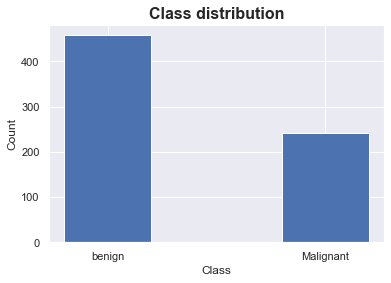

In [151]:
plt.bar(x=cancer['Class'].value_counts().index,
        height=cancer['Class'].value_counts().values)

plt.xlabel('Class',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks([2,4],labels=['benign','Malignant'])
plt.title('Class distribution',fontsize=16,fontweight='bold')

plt.show();

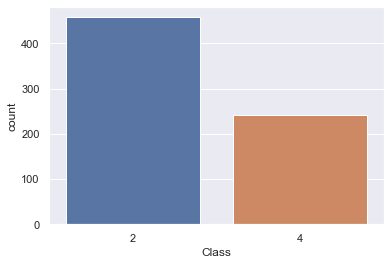

In [152]:
sns.set_style('darkgrid')
sns.countplot(cancer['Class']);

from above plot we can see that there is imbalance in class distribution in dataset so we will build the model by performing class balancing.

and also there is no missing values present in the dataset so no need to perform missing value impuatation.

In [153]:
cancer.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [154]:
## drop sample code number as it is not useful feature in predicting the class

cancer.drop(['Sample code number'],axis=1,inplace=True)

In [155]:
cancer['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [156]:
cancer[cancer['Bare Nuclei']=='?']

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


We can either replace this with mode or remove these rows as this is small % of records . we will proceed with removing the rows

In [157]:
cancer = cancer[cancer['Bare Nuclei']!='?']

In [158]:
cancer.head(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

from sklearn.utils import resample

In [160]:
X = cancer[cancer.columns.difference(['Class'])]
Y = cancer['Class']

In [161]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=100)


print("train size : ",len(x_train))
print("test size : ",len(x_test))

train size :  512
test size :  171


##### Class distribution in training dataset

In [162]:
y_train.value_counts()

2    337
4    175
Name: Class, dtype: int64

##### Class distribution in test dataset

In [163]:
y_test.value_counts()

2    107
4     64
Name: Class, dtype: int64

In [164]:
model_details = pd.DataFrame(columns = ['Model','Strategy Used','Train accuracy','Test accuracy'])
model_details

,Model,Strategy Used,Train accuracy,Test accuracy


### Model Building 

#### 1.Hyper parameter tuning

In [165]:
param_grid = {'C':[1,3,5,10,15,20],
             'kernel':['rbf','linear','poly','sigmoid'],
             'gamma':[0.0001,0.001,0.025,0.05,0.01,0.02,0.05,0.1,0.25,0.5],
             'degree':[2,3,4,5]}

In [166]:
model = SVC(random_state=100)

In [167]:
svm_grid = GridSearchCV(estimator=model,
            param_grid=param_grid,
            cv=5)

In [168]:
%time svm_grid.fit(x_train,y_train)

Wall time: 3h 45min 43s


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=100, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 3, 5, 10, 15, 20], 'degree': [2, 3, 4, 5],
                         'gamma': [0.0001, 0.001, 0.025, 0.05, 0.01, 0.02, 0.05,
                                   0.1, 0.25, 0.5],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [175]:
print(svm_grid.best_estimator_)

model1 = svm_grid.best_estimator_

y_train_pred = model1.predict(x_train)
y_test_pred =  model1.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(np.unique(y_train_pred))
print(np.unique(y_test_pred))

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=100, shrinking=True, tol=0.001,
    verbose=False)
[2 4]
[2 4]


In [230]:
print(classification_report(y_test,y_test_pred,target_names=['Benign','Malignant']))

              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99        55
   Malignant       1.00      0.98      0.99        65

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



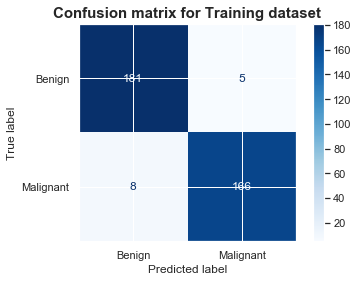

In [228]:
plot_confusion_matrix(model1,x_train,y_train,display_labels=['Benign','Malignant'],values_format='d',cmap=plt.cm.Blues)
plt.title('Confusion matrix for Training dataset',fontsize=15,fontweight='bold');

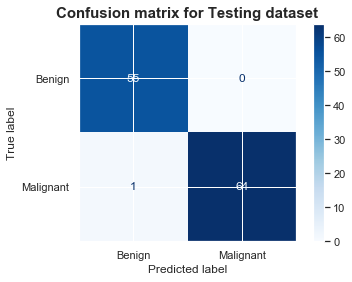

In [229]:
plot_confusion_matrix(model1,x_test,y_test,display_labels=['Benign','Malignant'],values_format='d',cmap=plt.cm.Blues)
plt.title('Confusion matrix for Testing dataset',fontsize=15,fontweight='bold');

In [240]:
model_details = model_details.append({'Model':'SVM + Grid Search','Strategy Used':'Hyper-parameter tuning','Train accuracy':train_accuracy,'Test accuracy':test_accuracy},
                     ignore_index=True)

model_details

,Model,Strategy Used,Train accuracy,Test accuracy
0,SVM + Grid Search,Hyper-parameter tuning,0.963889,0.991667


#### 2. Up-Sampling Minority Class 

In [233]:
cancer['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [234]:
### step 1 - separating data of diff classes
cancer_majority = cancer[cancer.Class==2]
cancer_minority = cancer[cancer.Class==4]

### step 2 - upsampling data of minority class - malignant
cancer_minority_resampled = resample(cancer_minority,replace=True,n_samples=444,random_state=100)

### step 3 - combining upsampled dataframe
cancer_upsampled = pd.concat([cancer_majority,cancer_minority_resampled],axis=0)

### step 4 - checking class distribution
print("Class distribution after up sampling minority class")
cancer_upsampled['Class'].value_counts()

Class distribution after up sampling minority class


4    444
2    444
Name: Class, dtype: int64

In [235]:
X = cancer_upsampled[cancer_upsampled.columns.difference(['Class'])]
Y = cancer_upsampled['Class']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=100)

print("train size : ",len(x_train))
print("test size : ",len(x_test))

train size :  666
test size :  222


In [243]:
svm_grid.best_params_

{'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}

In [244]:
model2 = SVC(C=1,kernel='rbf',gamma=0.001,random_state=100)
model2.fit(x_train,y_train)

y_train_pred = model2.predict(x_train)
y_test_pred =  model2.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(np.unique(y_train_pred))
print(np.unique(y_test_pred))

[2 4]
[2 4]


In [245]:
print(classification_report(y_test,y_test_pred,target_names=['Benign','Malignant']))

              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       116
   Malignant       0.95      0.98      0.97       106

    accuracy                           0.97       222
   macro avg       0.97      0.97      0.97       222
weighted avg       0.97      0.97      0.97       222



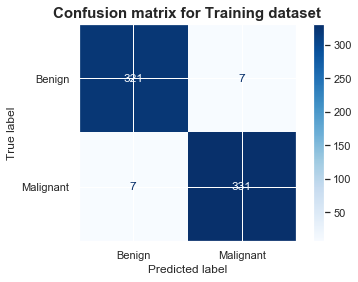

In [246]:
plot_confusion_matrix(model2,x_train,y_train,display_labels=['Benign','Malignant'],values_format='d',cmap=plt.cm.Blues)
plt.title('Confusion matrix for Training dataset',fontsize=15,fontweight='bold');

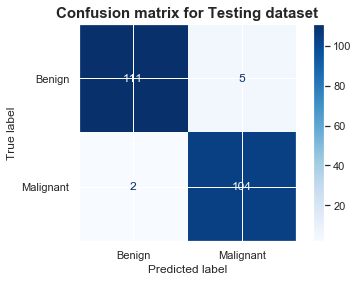

In [247]:
plot_confusion_matrix(model2,x_test,y_test,display_labels=['Benign','Malignant'],values_format='d',cmap=plt.cm.Blues)
plt.title('Confusion matrix for Testing dataset',fontsize=15,fontweight='bold');

In [248]:
model_details = model_details.append({'Model':'SVM','Strategy Used':'upsampling minority class','Train accuracy':train_accuracy,'Test accuracy':test_accuracy},
                     ignore_index=True)

model_details

,Model,Strategy Used,Train accuracy,Test accuracy
0,SVM + Grid Search,Hyper-parameter tuning,0.963889,0.991667
1,SVM,upsampling minority class,0.978979,0.968468


#### 3. Down-Sampling Majority Class 

In [249]:
### step 1 - separating data of diff classes
##---***** Already done *****---##

### step 2 - downsampling data of majority class - benign
cancer_majority_resampled = resample(cancer_majority,replace=True,n_samples=239,random_state=100)

### step 3 - combining downsampled dataframe
cancer_downsampled = pd.concat([cancer_minority,cancer_majority_resampled],axis=0)

### step 4 - checking class distribution
print("Class distribution after down sampling majority class")
cancer_downsampled['Class'].value_counts()

Class distribution after down sampling majority class


4    239
2    239
Name: Class, dtype: int64

In [250]:
X = cancer_downsampled[cancer_downsampled.columns.difference(['Class'])]
Y = cancer_downsampled['Class']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=100)

print("train size : ",len(x_train))
print("test size : ",len(x_test))

train size :  358
test size :  120


In [251]:
model3 = SVC(C=1,kernel='rbf',gamma=0.001,random_state=100)
model3.fit(x_train,y_train)

y_train_pred = model3.predict(x_train)
y_test_pred =  model3.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(np.unique(y_train_pred))
print(np.unique(y_test_pred))

[2 4]
[2 4]


In [252]:
print(classification_report(y_test,y_test_pred,target_names=['Benign','Malignant']))

              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98        58
   Malignant       0.98      0.98      0.98        62

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



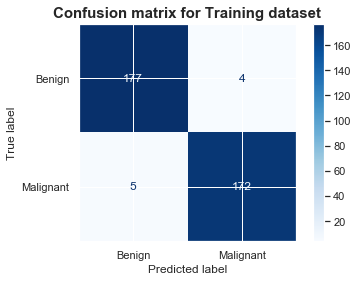

In [253]:
plot_confusion_matrix(model3,x_train,y_train,display_labels=['Benign','Malignant'],values_format='d',cmap=plt.cm.Blues)
plt.title('Confusion matrix for Training dataset',fontsize=15,fontweight='bold');

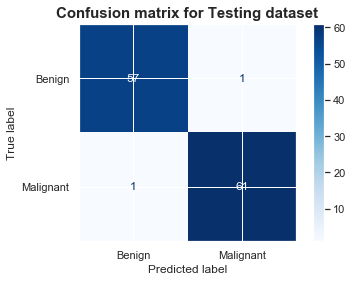

In [254]:
plot_confusion_matrix(model3,x_test,y_test,display_labels=['Benign','Malignant'],values_format='d',cmap=plt.cm.Blues)
plt.title('Confusion matrix for Testing dataset',fontsize=15,fontweight='bold');

In [255]:
model_details = model_details.append({'Model':'SVM','Strategy Used':'downsampling majority class','Train accuracy':train_accuracy,'Test accuracy':test_accuracy},
                     ignore_index=True)

model_details

,Model,Strategy Used,Train accuracy,Test accuracy
0,SVM + Grid Search,Hyper-parameter tuning,0.963889,0.991667
1,SVM,upsampling minority class,0.978979,0.968468
2,SVM,downsampling majority class,0.974860,0.983333


#### 4. Using class_weight parameter of SVM

In [256]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=100)

print("train size : ",len(x_train))
print("test size : ",len(x_test))

train size :  358
test size :  120


In [257]:
## setting class_weight='balanced' -> it will increase cost of misclassification on minority class

model4 = SVC(C=1,kernel='rbf',gamma=0.001,random_state=100,class_weight='balanced',probability=True)
model4.fit(x_train,y_train)

y_train_pred = model4.predict(x_train)
y_test_pred =  model4.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(np.unique(y_train_pred))
print(np.unique(y_test_pred))

[2 4]
[2 4]


In [258]:
print(classification_report(y_test,y_test_pred,target_names=['Benign','Malignant']))

              precision    recall  f1-score   support

      Benign       0.98      0.97      0.97        58
   Malignant       0.97      0.98      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



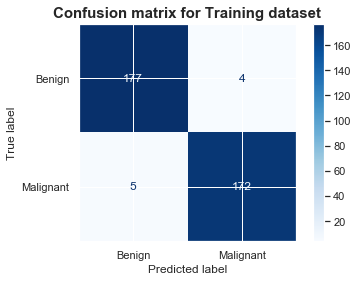

In [260]:
plot_confusion_matrix(model4,x_train,y_train,display_labels=['Benign','Malignant'],values_format='d',cmap=plt.cm.Blues)
plt.title('Confusion matrix for Training dataset',fontsize=15,fontweight='bold');

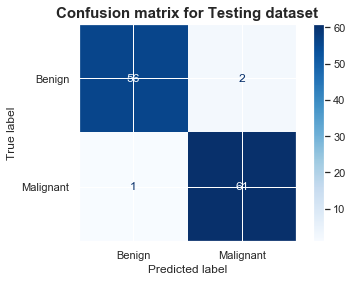

In [261]:
plot_confusion_matrix(model4,x_test,y_test,display_labels=['Benign','Malignant'],values_format='d',cmap=plt.cm.Blues)
plt.title('Confusion matrix for Testing dataset',fontsize=15,fontweight='bold');

In [262]:
model_details = model_details.append({'Model':'SVM','Strategy Used':'class_weight=balanced','Train accuracy':train_accuracy,'Test accuracy':test_accuracy},
                     ignore_index=True)

model_details

,Model,Strategy Used,Train accuracy,Test accuracy
0,SVM + Grid Search,Hyper-parameter tuning,0.963889,0.991667
1,SVM,upsampling minority class,0.978979,0.968468
2,SVM,downsampling majority class,0.974860,0.983333
3,SVM,class_weight=balanced,0.974860,0.975000
